<a href="https://colab.research.google.com/github/srik6724/MAT-422/blob/main/Homework_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.3.1 QR Decomposition

In [1]:
import numpy as np
A = np.array([[10,5,8],[-11,8,4],[72,12,3]])
print("Vector A")
print(A)
v1 = np.array([10,-11,72])
v2 = np.array([5,8,12])
v3 = np.array([8,4,3])
print("v1, v2, and v3")
print(v1, v2, v3)
print("Normalize v1")
print("u1 = v1/length of v1")
lengthv1 = np.linalg.norm(v1)
u1 = v1/np.linalg.norm(v1)
print("u1 = ",u1)
print("Now make v2 orthogonal to u1.")
print("u2 = v2 - Proj(v1)v2")
proj_of_v2_on_v1 = (np.dot(v2, v1)/lengthv1**2)*v1
U2 = v2 - proj_of_v2_on_v1
print("u2 = ", U2)
print("Normalize u2")
lengthU2 = np.linalg.norm(U2)
u2 = U2/np.linalg.norm(U2)
print("u2 = ", u2)
print("Now make v3 orthogonal to u1 and u2.")
print("u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)")
a = (np.dot(v3, u1))
b = (np.dot(v3, u2))
U3 = v3 - ((np.multiply(a,u1)) + (np.multiply(b,u2)) )
print("u3 = ", U3)
print("Normalize u3")
lengthU3 = np.linalg.norm(U3)
u3 = U3/np.linalg.norm(U3)
print("u3 = ", u3)
print("Vector Q = [u1, u2, u3]")
print("Each vector u1, u2, and u3 are normalized and they are orthogonal to one another, with a dot-product of zero.")

Vector A
[[ 10   5   8]
 [-11   8   4]
 [ 72  12   3]]
v1, v2, and v3
[ 10 -11  72] [ 5  8 12] [8 4 3]
Normalize v1
u1 = v1/length of v1
u1 =  [ 0.13601981 -0.14962179  0.9793426 ]
Now make v2 orthogonal to u1.
u2 = v2 - Proj(v1)v2
u2 =  [3.47178538 9.68103608 0.99685476]
Normalize u2
u2 =  [0.3359923  0.9369109  0.09647357]
Now make v3 orthogonal to u1 and u2.
u3 = v3 - ((v3dotu1)u1 + ((v3dotu2)u2)
u3 =  [ 5.27421594 -1.78786981 -1.00567677]
Normalize u3
u3 =  [ 0.9319913  -0.31592926 -0.17771021]
Vector Q = [u1, u2, u3]


1.3.2 Least-Squares problems

In [3]:
import numpy as np
def gram_schmidt(A):
    Q=np.zeros_like(A)
    cnt = 0
    for a in A.T:
        u = np.copy(a)
        for i in range(0, cnt):
            u -= np.dot(np.dot(Q[:, i].T, a), Q[:, i])
        e = u / np.linalg.norm(u)
        Q[:, cnt] = e
        cnt += 1
    R = np.dot(Q.T, A)
    return (Q, R)

np.set_printoptions(precision=4, suppress=True)
A = np.array([[2,-2],[2, 0],[2, 2]], dtype = float)

(Q, R) = gram_schmidt(A)
print(Q)
print(R)
print(np.dot(Q, R))

[[ 0.5774 -0.7071]
 [ 0.5774  0.    ]
 [ 0.5774  0.7071]]
[[3.4641 0.    ]
 [0.     2.8284]]
[[ 2. -2.]
 [ 2.  0.]
 [ 2.  2.]]


In [4]:
import numpy as np
b = np.array([[-4],[4],[6]], dtype = float)
print("Vector b")
print(b)
QT = np.transpose(Q)
print("Q Transposed")
print(QT)
R1 = np.linalg.inv(R)
print("Inverse of R")
print(R1)
print("x = R^-1*Q(Transposed)b")
mult1 = np.dot(QT,b)
mult2 = np.dot(R1,mult1)
print(mult2)

Vector b
[[-4.]
 [ 4.]
 [ 6.]]
Q Transposed
[[ 0.5774  0.5774  0.5774]
 [-0.7071  0.      0.7071]]
Inverse of R
[[0.2887 0.    ]
 [0.     0.3536]]
x = R^-1*Q(Transposed)b
[[1. ]
 [2.5]]


1.3.3 Linear Regression

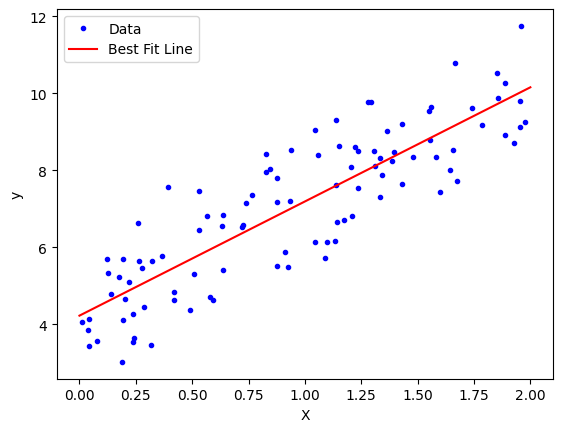

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(0)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)  # 100 data points with 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Add x0 = 1 to each instance to account for the bias term (intercept)
X_b = np.c_[np.ones((100, 1)), X]

# Compute the optimal parameters using the Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict using the computed parameters
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best

# Plot the data and the best-fit line
plt.plot(X, y, "b.", label="Data")
plt.plot(X_new, y_predict, "r-", label="Best Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()